In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def read_calibration_sheet(fname, sheets=None):
    if not sheets:
        sheets = {'ADC Solutions @ 1.5T':{'name':'ADC_15T', 'head':3, 'tail':2},
                'ADC Solutions @ 3.0T':{'name':'ADC_3T', 'head':3, 'tail':2},
                'NiCl Solutions @ 1.5T':{'name':'NiCl_15T', 'head':3, 'tail':2},
                'NiCl Solutions @ 3.0T':{'name':'NiCl_3T', 'head':3, 'tail':2},
                'MnCl Solutions @ 1.5T':{'name':'MnCl_15T', 'head':3, 'tail':2},
                'MnCl Solutions @ 3.0T':{'name':'MnCl_3T', 'head':3, 'tail':2},
                'CuSO4 Solutions @ 3.0T':{'name':'CuS04_3T', 'head':3, 'tail':3},
                'CMRI LC Values':{'name':'CMRI_LC', 'head':3, 'tail':0}}
    
    data = {}
    for sheet_key in sheets.keys():
        df = pd.read_excel(f, sheet_name=sheet_key, header=sheets[sheet_key]['head'])
        data[sheets[sheet_key]['name']] = df[:-1*sheets[sheet_key]['tail']]

    return data

In [3]:
# Insert link to your own calibration sheet here
f = '/Users/emil/Box_Lund/Hyperfine/CaliberPhantom/Calibration/reference_measurements_137-0004.xlsx'
df = read_calibration_sheet(f)


In [4]:
# NiCl Solutions (T1 spheres) @ 1.5T
def make_15T_plots(df, key, title):
    fig = plt.figure(figsize=(12,4))
    x = df[key]['Concentration (mM)']
    T1 = df[key]['T1 (ms)']
    T2 = df[key]['T2 (ms)']

    fig.add_subplot(1,3,1)
    plt.plot(x, 1/T1, 'o-')
    plt.xlabel('Concentration (mM)'); plt.ylabel('T1 (ms)'); plt.grid()

    fig.add_subplot(1,3,2)
    plt.plot(x, 1/T2, 'o-')
    plt.xlabel('Concentration (mM)'); plt.ylabel('T2 (ms)'); plt.grid()

    fig.add_subplot(1,3,3)
    plt.plot(1/T1, 1/T2, 'o')
    plt.xlabel('T1 (ms)'); plt.ylabel('T2 (ms)'); plt.grid()
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def make_3T_plots(df, key, title):
    fig = plt.figure(figsize=(12,4))
    temps = [16, 18, 20, 22, 24, 26]

    axT1 = fig.add_subplot(1,3,1); plt.grid(); plt.xlabel('Concentration (mM)'); plt.ylabel('R1 (1/ms)')
    axT2 = fig.add_subplot(1,3,2); plt.grid(); plt.xlabel('Concentration (mM)'); plt.ylabel('R2 (1/ms)')
    axT1T2 = fig.add_subplot(1,3,3); plt.grid(); plt.xlabel('R1 (1/ms)'); plt.ylabel('R2 (1/ms)')

    # for t in temps:
    df_3T = df[key]
    for t in temps:
        df_temp = df_3T[df_3T['Temperature (C)']==t]
        x = df_temp['Concentration (mM)']

        axT1.plot(x, 1/df_temp['T1 (ms)'], '-o')
        axT2.plot(x, 1/df_temp['T2 (ms)'], '-o', label='{} C'.format(t))
        axT1T2.plot(1/df_temp['T1 (ms)'], 1/df_temp['T2 (ms)'], 'o')

    plt.suptitle(title)
    axT2.legend()
    plt.tight_layout()
    plt.show()

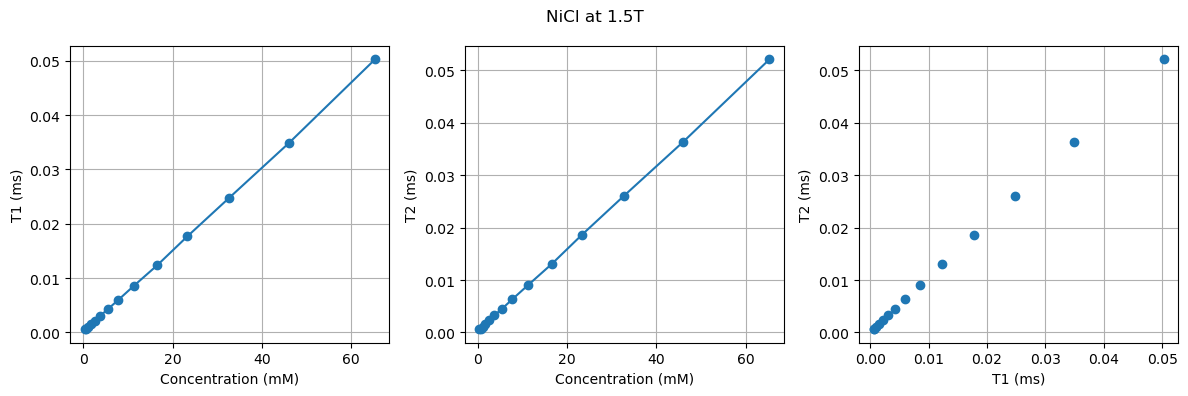

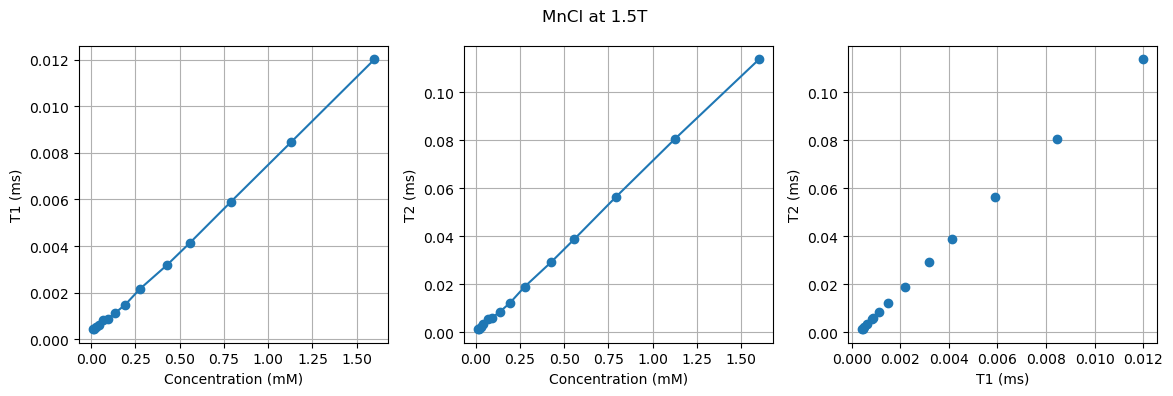

In [5]:
make_15T_plots(df, 'NiCl_15T', 'NiCl at 1.5T')
make_15T_plots(df, 'MnCl_15T', 'MnCl at 1.5T')

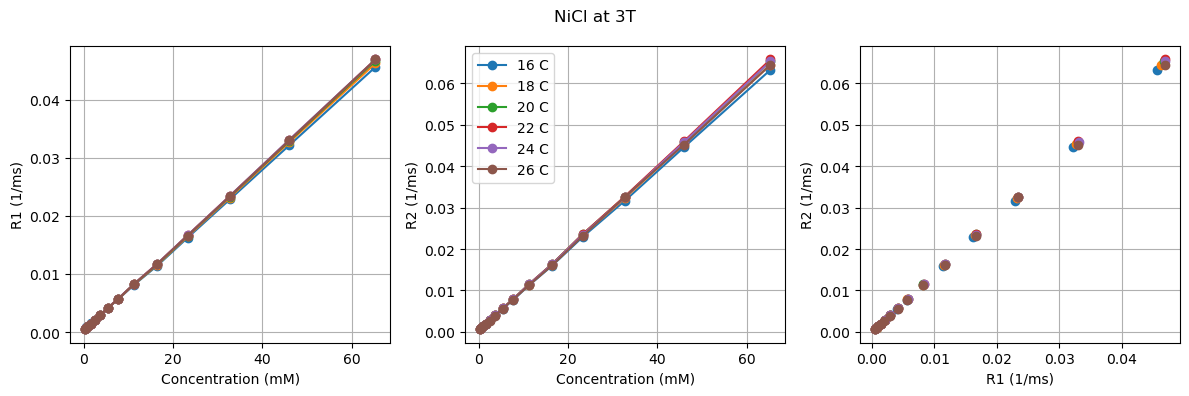

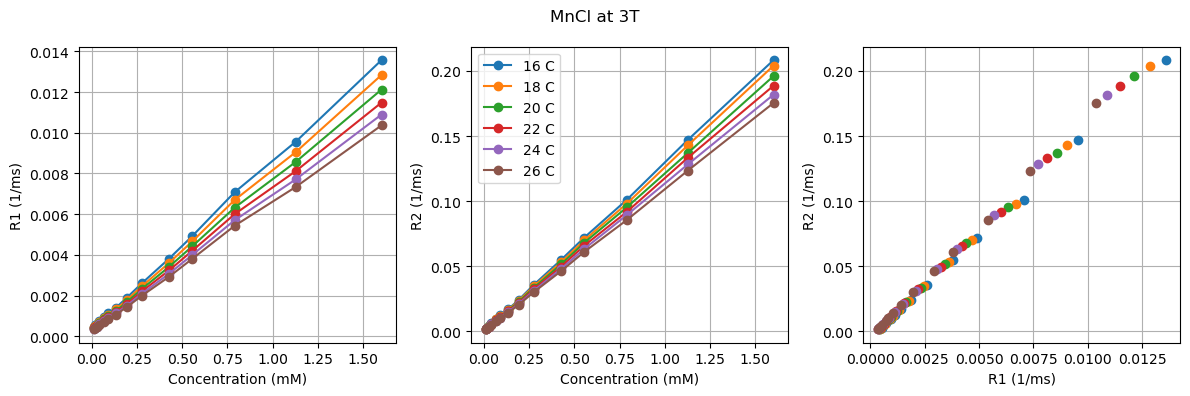

In [6]:
make_3T_plots(df, 'NiCl_3T', 'NiCl at 3T')
make_3T_plots(df, 'MnCl_3T', 'MnCl at 3T')

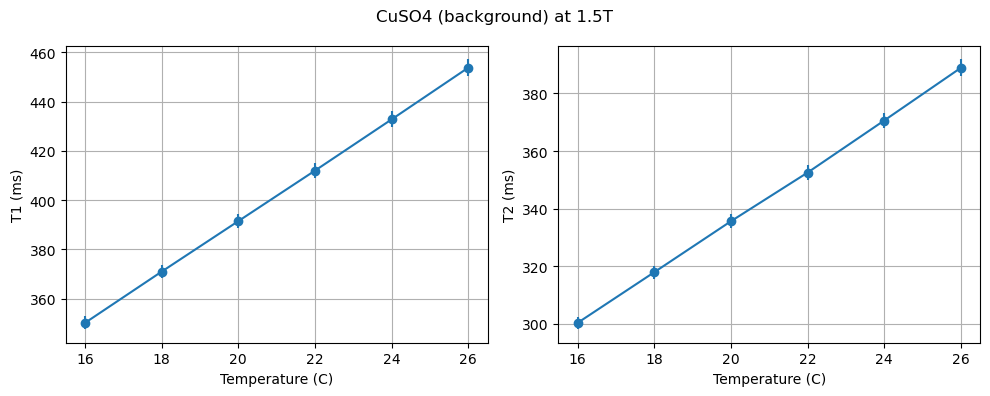

In [7]:
# CuSO4 solution 3T vs temperature
cuso4 = df['CuS04_3T']
relax=['T1', 'T2']

fig = plt.figure(figsize=(10,4))
for (i,T) in enumerate(relax):
    fig.add_subplot(1,2,i+1)
    plt.errorbar(cuso4['Temperature (C)'], cuso4[f'{T} (ms)'], yerr=cuso4[f'{T} Uncertainty (ms)'], marker='o')
    plt.xlabel('Temperature (C)')
    plt.ylabel(f"{T} (ms)")
    plt.grid()

plt.suptitle('CuSO4 (background) at 1.5T')
plt.tight_layout()
plt.show()


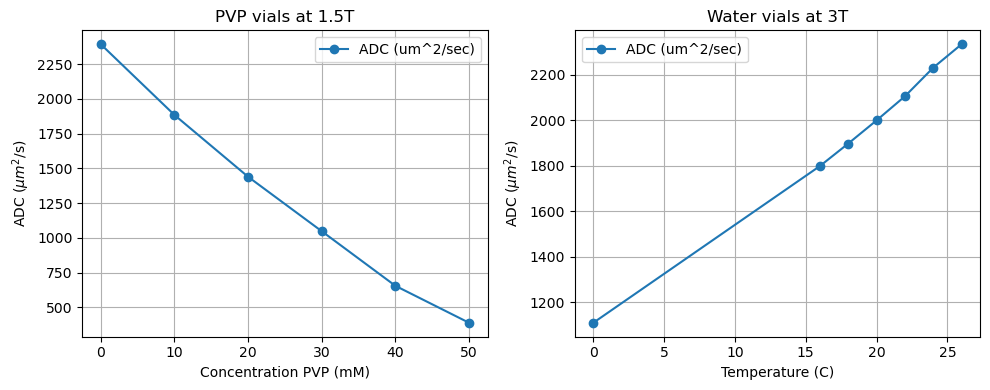

In [8]:
# ADC solutions
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
df['ADC_15T'].plot(x='Concentration (mM)', y='ADC (um^2/sec)', ax=ax, marker='o')
plt.xlabel('Concentration PVP (mM)')
plt.ylabel(r"ADC ($\mu m^2$/s)")
plt.grid()
plt.title('PVP vials at 1.5T')

ax = fig.add_subplot(1,2,2)
df['ADC_3T'].plot(x='Temperature (C)', y='ADC (um^2/sec)', ax=ax, marker='o')
plt.grid()
plt.ylabel(r"ADC ($\mu m^2$/s)")
plt.title("Water vials at 3T")
plt.tight_layout()

